In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# Load the data

In [3]:
# 加载地图shp文件
oklahoma_map = gpd.read_file('Igismap/UnitedStates_Boundary.shp')

# earthquake data
inputdir = "datasets/EarthquakeData"
all_earthquake_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root, filename))
        all_earthquake_df = all_earthquake_df.append(df, ignore_index=True)
        
        
# injection data
# inputdir = "datasets/OCC_injection_data/YearlyInjectionRecords"
inputdir = "datasets/OCC_injection_data/MonthlyInjectionRecords"
monthly_injection_df = pd.DataFrame()

for root, dirnames, filenames in os.walk(inputdir):
    for filename in filenames:
        df = pd.read_excel(os.path.join(root, filename))
        monthly_injection_df = monthly_injection_df.append(df, ignore_index=True)

In [4]:
all_earthquake_df.sort_values(by='origintime')  # 2005-10-28 -- 2021-05-05

,event_id,origintime,magnitude,magnitude_source,max_mmi,latitude,longitude,depth_km,err_lat,err_lon,err_depth,err_origintime,state,county,status
0,0,2000-06-18 15:54:30,2.2,OGS,None,34.917000,-98.186000,2.28,None,None,None,None,None,CADDO,None
1,0,2000-10-08 10:16:25,2.4,OGS,5,35.391000,-97.941000,5.00,None,None,None,None,None,CANADIAN,None
2,0,2000-11-10 00:14:31,2.4,OGS,None,35.824000,-98.255000,5.00,None,None,None,None,None,BLAINE,None
3,0,2000-11-11 00:14:32,2.4,OGS,None,34.774000,-97.806000,0.98,None,None,None,None,None,GRADY,None
4,0,2001-01-27 00:57:54,2.3,OGS,None,34.640000,-95.952000,5.19,None,None,None,None,None,ATOKA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26151,48969,2021-05-30 04:02:02,2.3,OGS,None,36.532452,-98.980141,3.08,1.56,1.54,1.33,0.29056252,Oklahoma,Woodward,Preliminary
26152,48978,2021-05-30 15:26:45,2.4,OGS,None,35.102898,-95.335548,0.86,6.41,3.64,3.48,0.86833805,Oklahoma,Pittsburg,Preliminary
26153,48985,2021-05-30 22:07:46,2.3,OGS,None,34.627842,-96.307716,0.75,3.9,3.03,2.73,0.7425026,Oklahoma,Coal,Preliminary
26154,48989,2021-05-31 02:05:44,2.6,OGS,None,36.274757,-97.709076,1.56,0.96,0.84,1.12,0.17720415,Oklahoma,Garfield,Preliminary


In [7]:
# 设置origintime为index
all_earthquake_df = all_earthquake_df.set_index('origintime')

In [245]:
# earthquake_df = all_earthquake_df
start = "2018"
# end = "2019"
earthquake_df = all_earthquake_df.loc[start:]

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


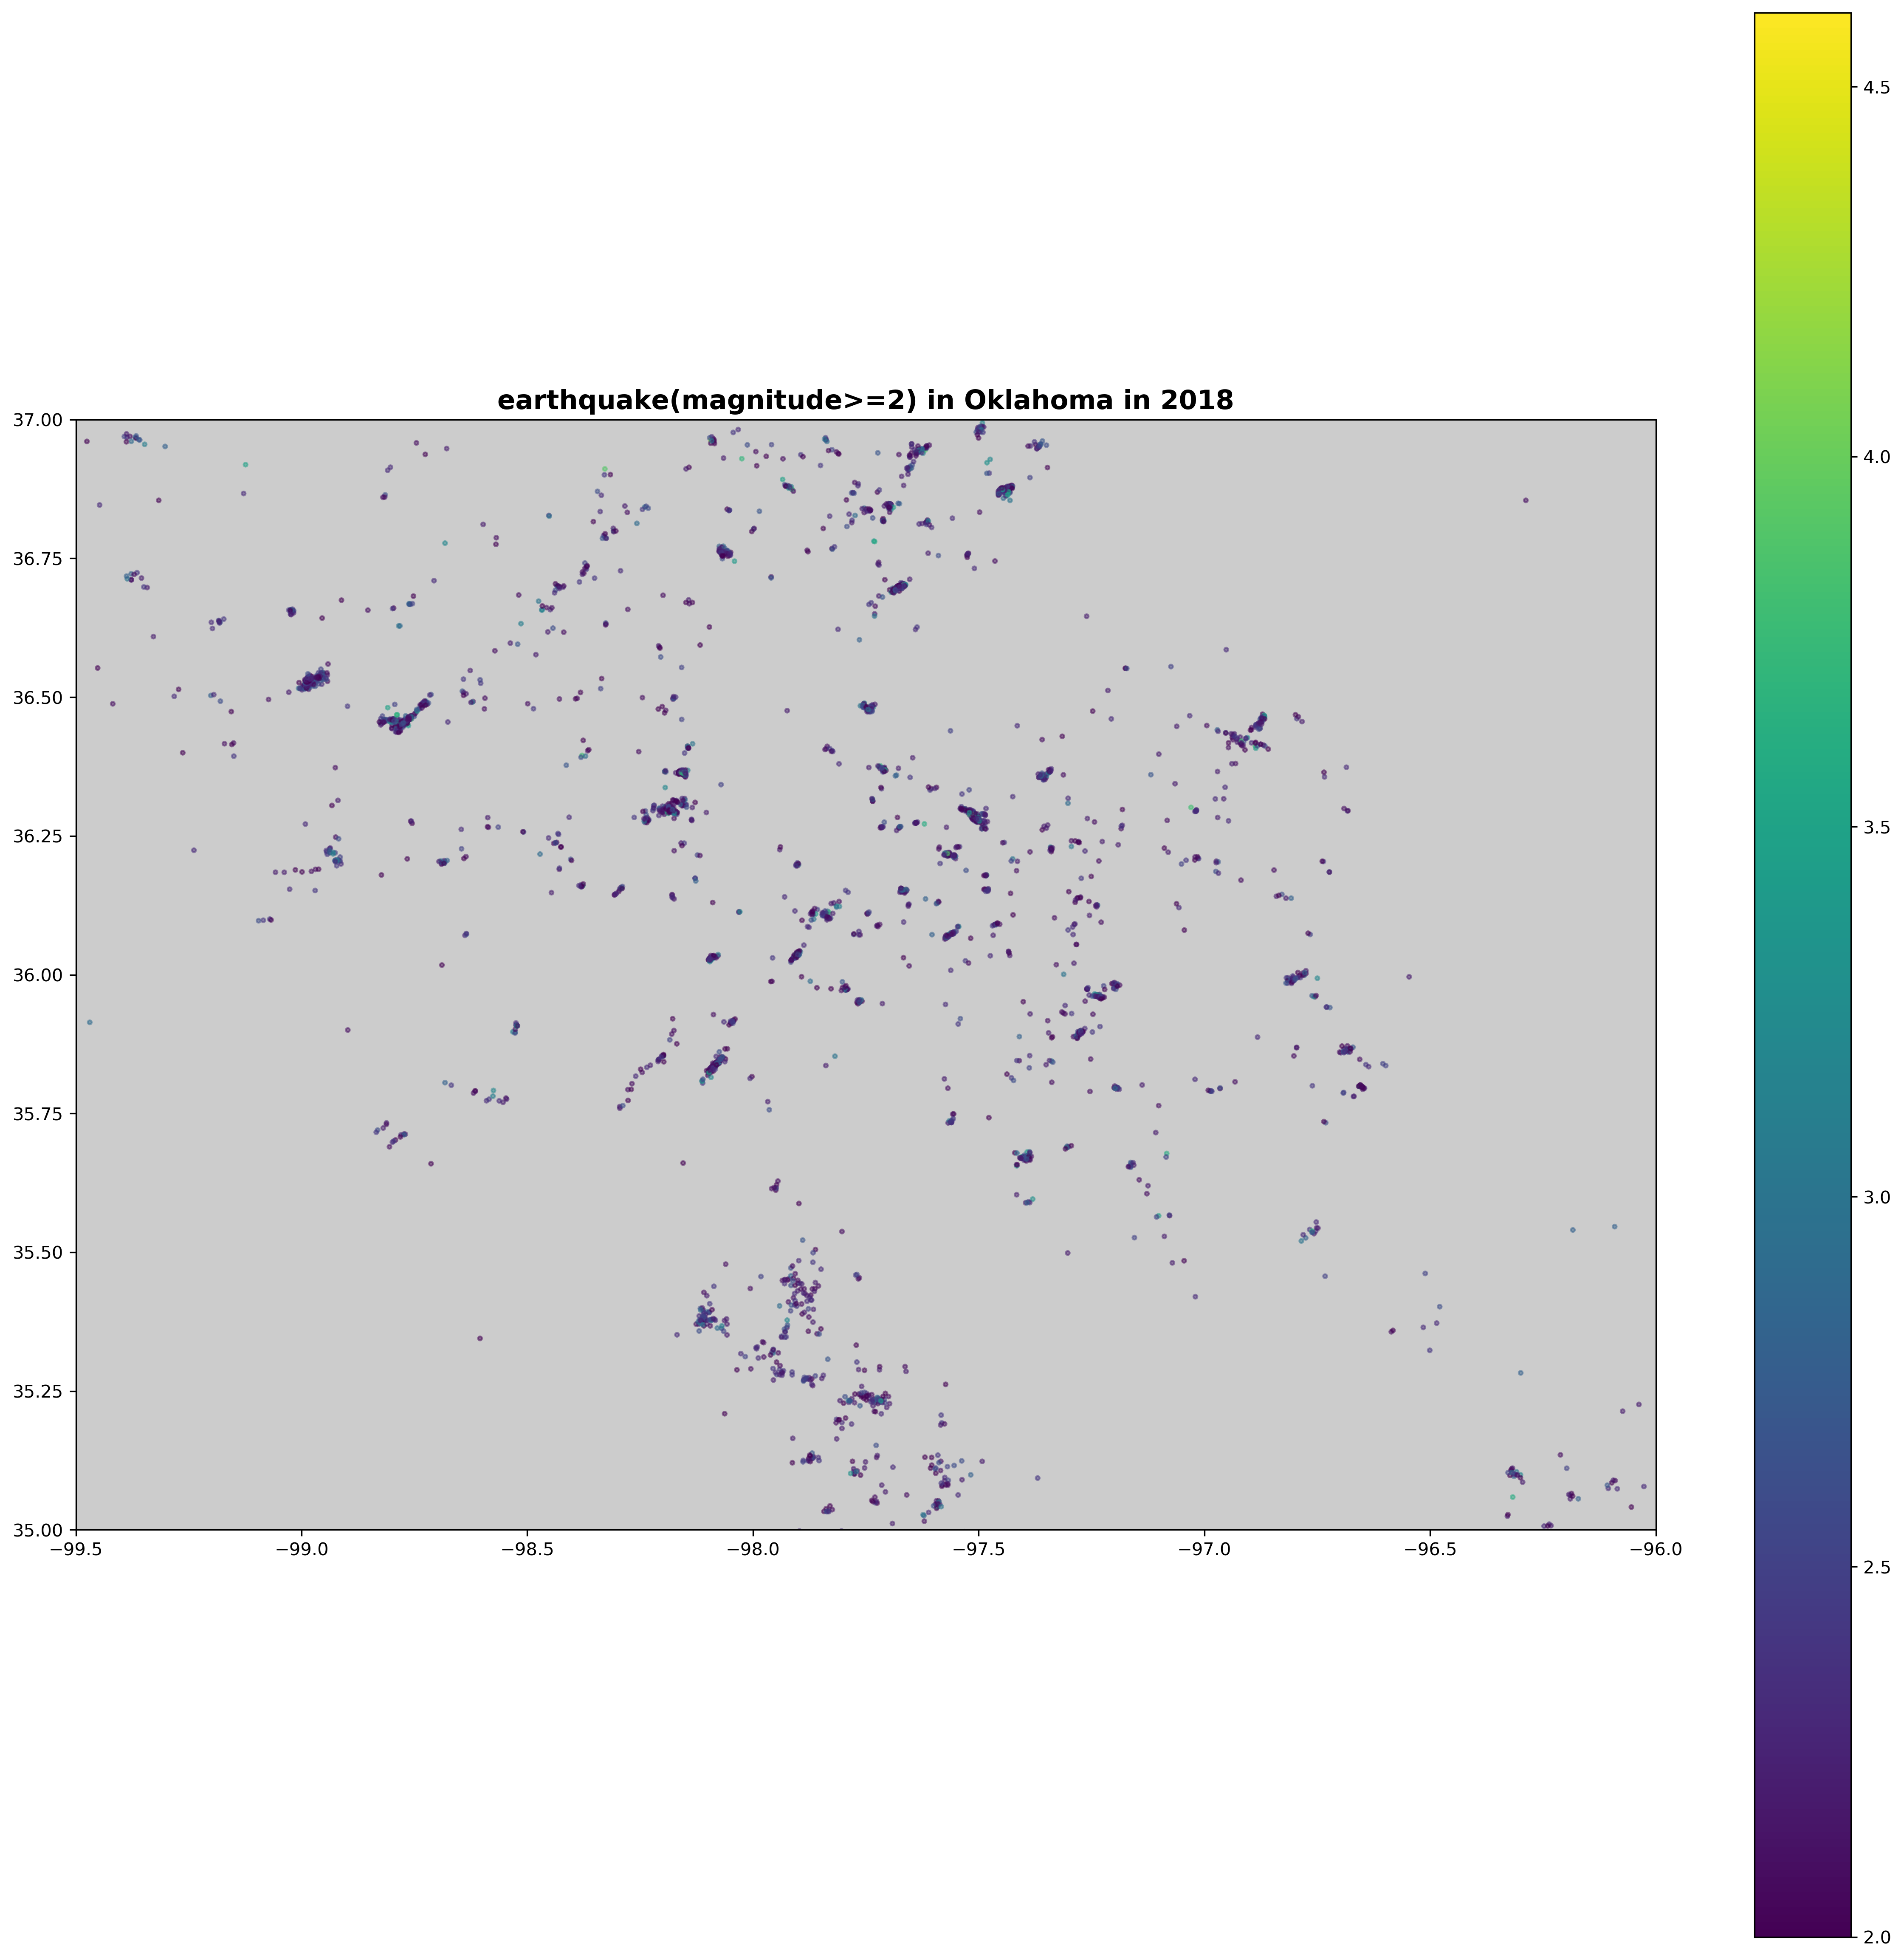

In [246]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
earthquake_geometry = [Point(xy) for xy in zip(earthquake_df['longitude'], earthquake_df['latitude'])]

# create GeoPandas dataframe
earthquake_geo_df = gpd.GeoDataFrame(earthquake_df, crs = crs, geometry = earthquake_geometry)


# earthquake 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘magnitude’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
earthquake_geo_df.plot(column='magnitude',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('earthquake(magnitude>=2) in Oklahoma in ' + start, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

# injection

In [32]:
monthly_injection_df.sort_values(by='Report_Date') #2012-09-21 -- 2020-12-31

,API,Well_Name,Well_Number,Operator_Number,Operator_Name,Daily_Report_Date_Start,Daily_Report_Date_End,Volume_BPD,Pressure_PSI,Latitude,Longitude,DirArea,Directive_Status
Report_Date,,,,,,,,,,,,,
2012-09-21,3505322940,GEORGE SWD,1,103155,EAGLE EXPLORATION PRODUCTION LLC,2012-09-16,2019-10-13,150.0,0.0,36.798470,-98.038658,OWRA,NOT AN ARBUCKLE WELL
2012-09-22,3505322940,GEORGE SWD,1,103155,EAGLE EXPLORATION PRODUCTION LLC,2012-09-16,2019-10-13,170.0,0.0,36.798470,-98.038658,OWRA,NOT AN ARBUCKLE WELL
2012-09-23,3505322940,GEORGE SWD,1,103155,EAGLE EXPLORATION PRODUCTION LLC,2012-09-16,2019-10-13,160.0,0.0,36.798470,-98.038658,OWRA,NOT AN ARBUCKLE WELL
2012-09-24,3505322940,GEORGE SWD,1,103155,EAGLE EXPLORATION PRODUCTION LLC,2012-09-16,2019-10-13,131.0,0.0,36.798470,-98.038658,OWRA,NOT AN ARBUCKLE WELL
2012-09-25,3505322940,GEORGE SWD,1,103155,EAGLE EXPLORATION PRODUCTION LLC,2012-09-16,2019-10-13,2955.0,0.0,36.798470,-98.038658,OWRA,NOT AN ARBUCKLE WELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,3508324011,BRANSON 17-4-23,1 SWD,144992,CONTANGO MIDSTREAM COMPANY,2013-02-24,2021-03-21,25.0,0.0,35.928088,-97.601456,OCRA,PLUGGED BACK
2020-12-31,3503720634,YARHOLA ROYALTY UNIT (C KEY WSW-1),WSW-1,14942,DEXXON INC,2019-11-24,2021-03-21,0.0,0.0,35.960610,-96.580720,OCRA,ERF
2020-12-31,3510935841,"YOUNT ""A"" (CLAUDE YOUNT 1)",1,8190,WHITE OPERATING COMPANY,2015-12-27,2021-03-21,1406.0,0.0,35.453150,-97.489670,OWRA,NOT IN GRANITE


In [ ]:
# 设置Report_Date为index
monthly_injection_df = monthly_injection_df.set_index('Report_Date')

In [243]:
# injection_df = monthly_injection_df
# start = "2010"
end = "2019"
injection_df = monthly_injection_df.loc[:end]

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


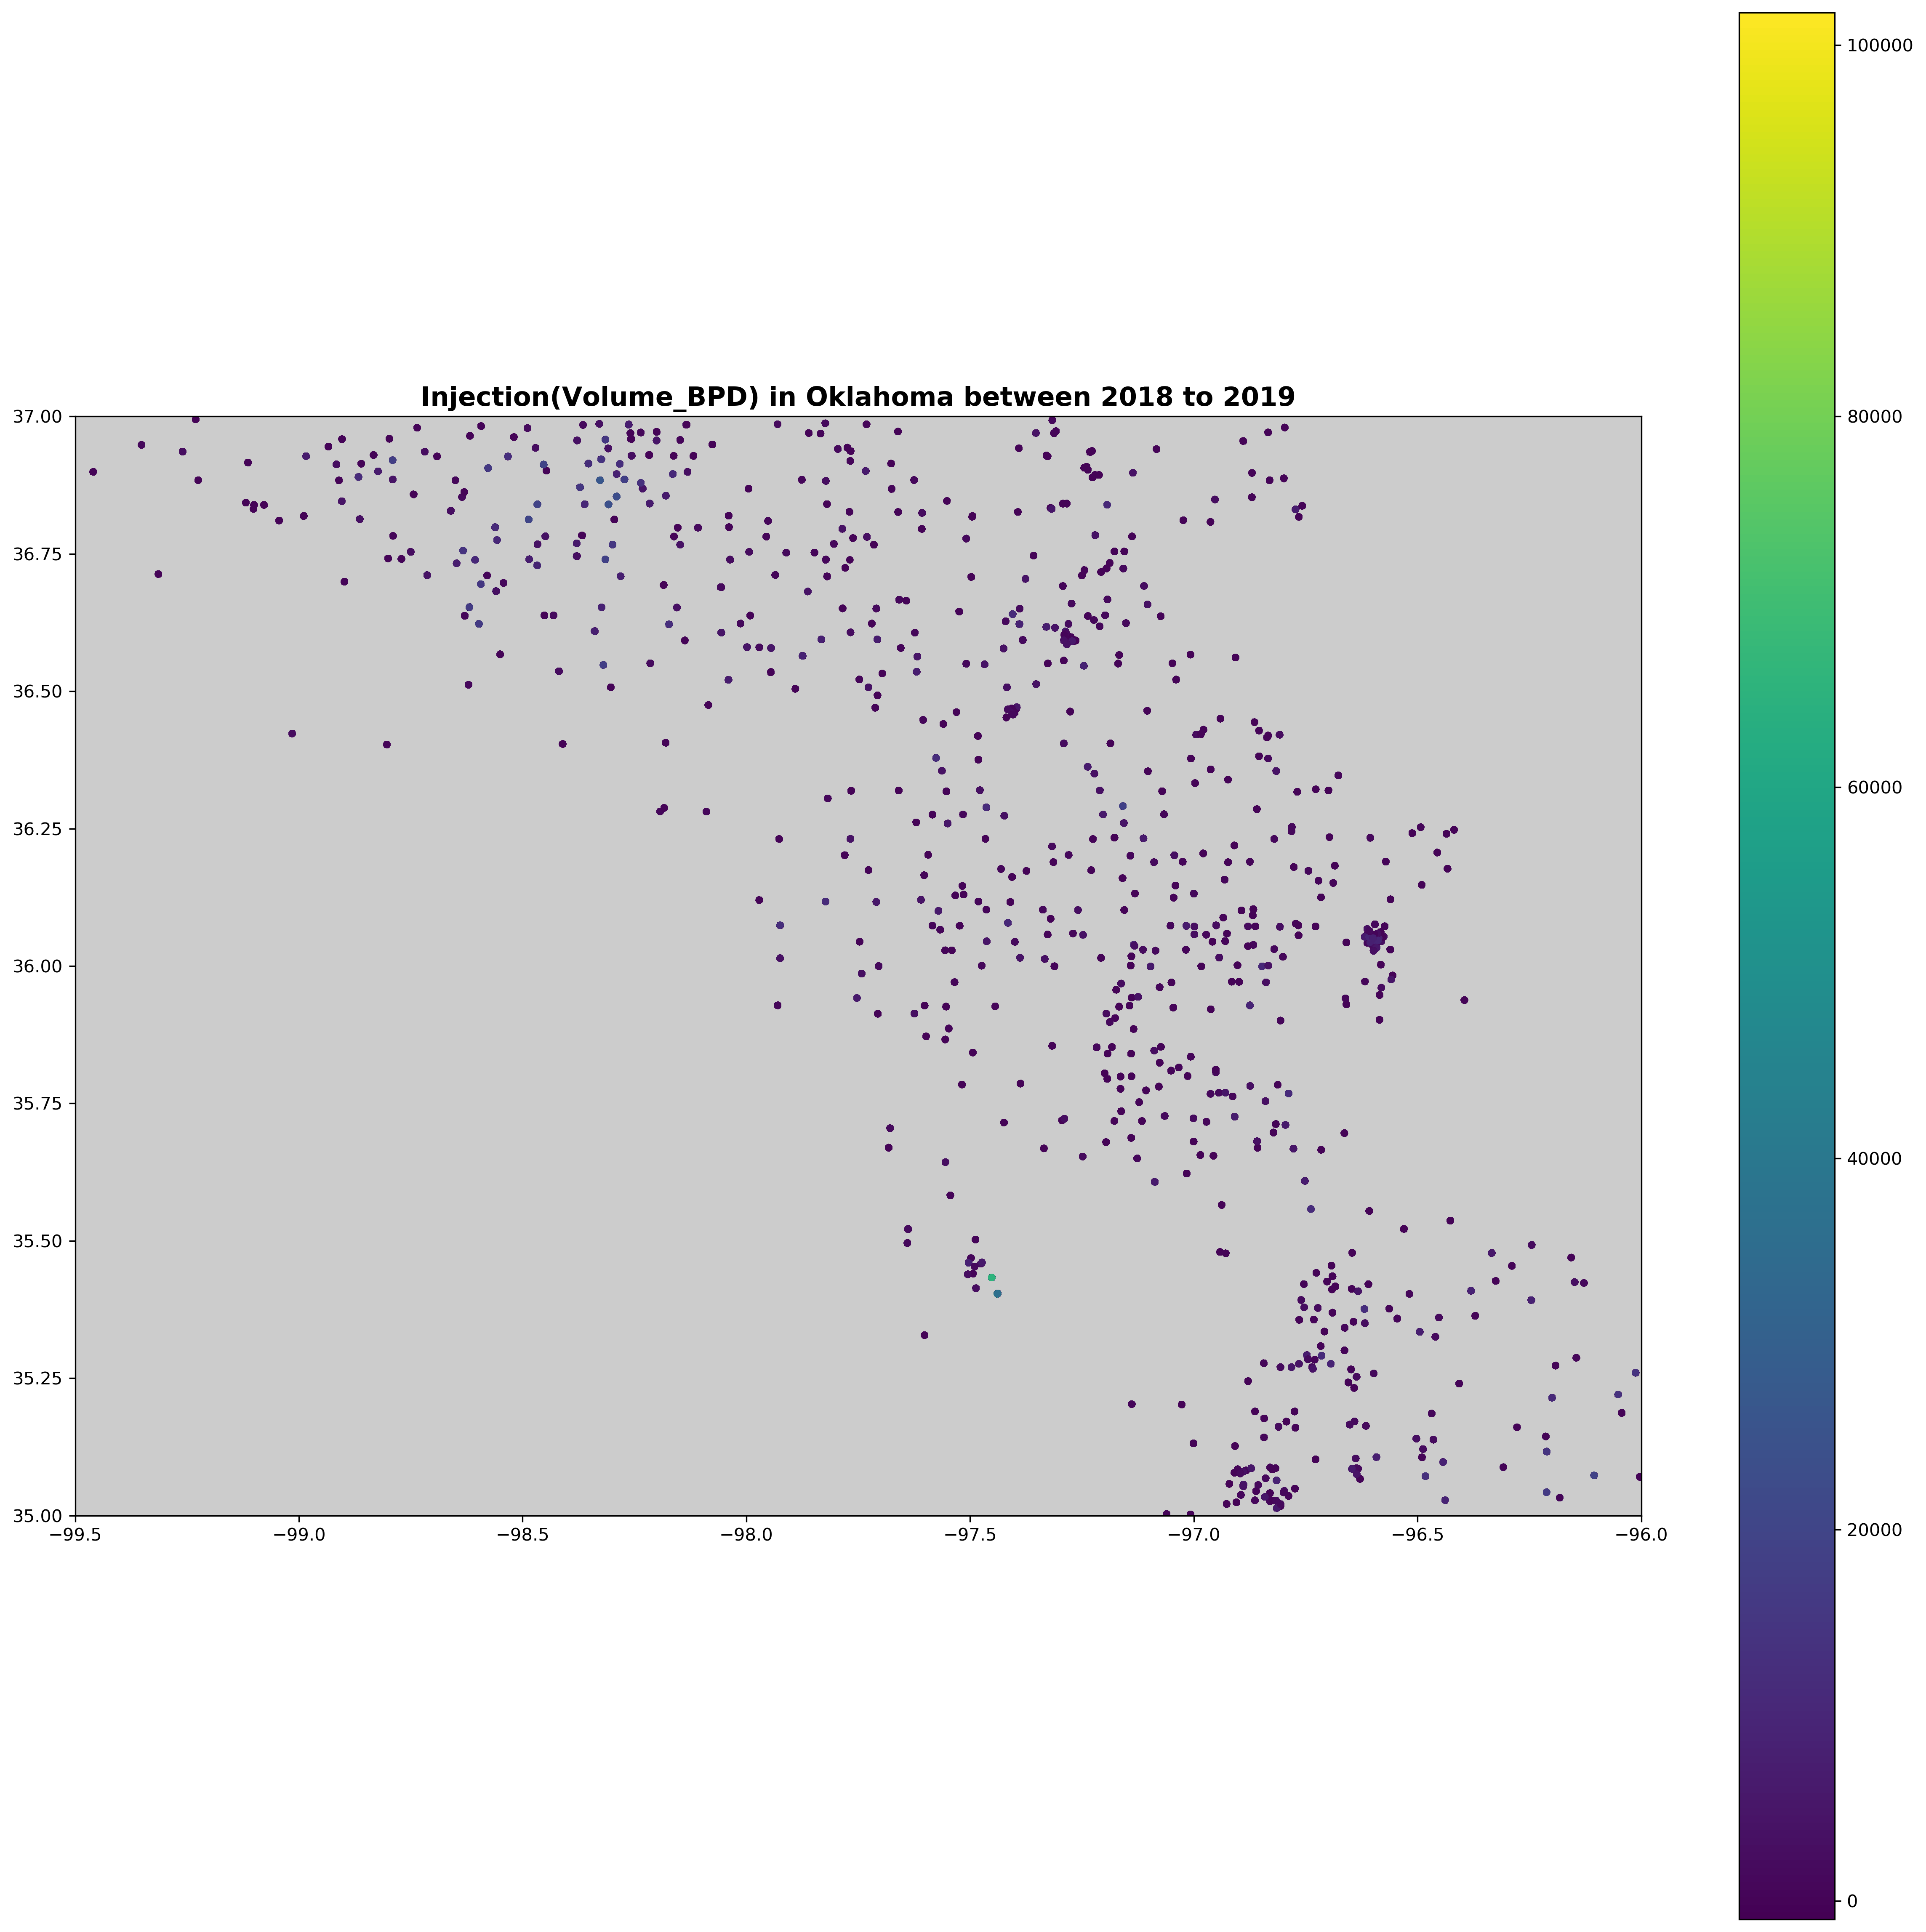

In [244]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
injection_geometry = [Point(xy) for xy in zip(injection_df['Longitude'], injection_df['Latitude'])]

# create GeoPandas dataframe
injection_geo_df = gpd.GeoDataFrame(injection_df, crs = crs, geometry = injection_geometry)

# Injection 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Volume_BPD’ variaable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
injection_geo_df.plot(column='Volume_BPD',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Injection(Volume_BPD) in Oklahoma between '+start+" to "+end, fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-99.5, -96)
plt.ylim(35, 37)
# plt.xlim(-98, -97.5)
# plt.ylim(36.5, 37)
# show map
plt.show()

In [95]:
inputdir = "datasets/WellData/"
all_well_df = pd.read_csv(inputdir + "Export - Excel Well Workbook_Header.csv")

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (24,28,31,33,42,46,48,49,50,55,58,62,70,73,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [96]:
all_well_df

,UWI,Source,API Number,IC Number,Regulatory API,Operator Name,Operator City,Current Operator Name,Current Operator City,Lease Name,...,Surface LL Source,Proposed BH Latitude,Proposed BH Longitude,Proposed BH LL Source,BH Latitude,BH Longitude,BH LL Source,Activity Code,Permit Filer Long,Permit Phone
0,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,MOORE REX R JR,NaN,MOORE REX R JR,NaN,WYATT `A`UNIT,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
1,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,HADSON OHIO OIL CO,NaN,HADSON OHIO OIL CO,NaN,KIRKPATRICK,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
2,3.508320e+13,PI,3.508320e+13,NaN,NaN,LOBAR OIL CO INC,NaN,LOBAR OIL CO INC,NaN,DENNY,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
3,3.508320e+13,PI,3.508320e+13,NaN,NaN,BLAIK OIL CO,NaN,BLAIK OIL CO,NaN,WALL,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
4,3.508320e+13,PI,3.508320e+13,NaN,3.508321e+09,MOORE REX R JR,NaN,MOORE REX R JR,NaN,WYATT UNIT,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237670,3.514920e+13,PI,3.514920e+13,NaN,NaN,PHILLIPS PETROLEUM CO,NaN,PHILLIPS PETROLEUM CO,NaN,LUEKENGA /A/,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
237671,3.514920e+13,PI,3.514920e+13,NaN,NaN,ENSERCH EXPLORATION INC,NaN,ENSERCH EXPLORATION INC,NaN,ADA STINSON,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
237672,3.514920e+13,PI,3.514920e+13,NaN,NaN,EL PASO NATURAL GAS CO,NaN,BURLINGTON RESOURCES O&G CO LP,NaN,PIERCE WILLIE `A`,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
237673,3.514920e+13,PI,3.514920e+13,NaN,NaN,BELMONT OIL CORP,NaN,BELMONT OIL CORP,NaN,SOUTH ELK,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN


In [97]:
all_well_df['Date Completion'] = all_well_df['Date Completion'].astype('datetime64')
all_well_df = all_well_df.dropna(subset=["Date Completion"])

In [98]:
all_well_df['Date Completion'].isnull().any()

False

In [99]:
# 设置Report_Date为index
all_well_df = all_well_df.set_index('Date Completion')

In [100]:
all_well_df

,UWI,Source,API Number,IC Number,Regulatory API,Operator Name,Operator City,Current Operator Name,Current Operator City,Lease Name,...,Surface LL Source,Proposed BH Latitude,Proposed BH Longitude,Proposed BH LL Source,BH Latitude,BH Longitude,BH LL Source,Activity Code,Permit Filer Long,Permit Phone
Date Completion,,,,,,,,,,,,,,,,,,,,,
1978-09-10,3.508320e+13,PI,3.508320e+13,NaN,NaN,LOBAR OIL CO INC,NaN,LOBAR OIL CO INC,NaN,DENNY,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-05-12,3.508320e+13,PI,3.508320e+13,NaN,NaN,BLAIK OIL CO,NaN,BLAIK OIL CO,NaN,WALL,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-09-29,3.508320e+13,PI,3.508320e+13,NaN,NaN,FULLER W M & A P,NaN,DAVIS WILLIAM H,NaN,WISS,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-09-21,3.508320e+13,PI,3.508320e+13,NaN,NaN,POLK B R INC,NaN,POLK B R INC,NaN,GRIFFEY YORK,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1978-08-31,3.508320e+13,PI,3.508320e+13,NaN,NaN,MOORE REX R JR,NaN,MOORE REX R JR,NaN,RIETZ JENNIE,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974-10-21,3.514920e+13,PI,3.514920e+13,NaN,NaN,PHILLIPS PETROLEUM CO,NaN,PHILLIPS PETROLEUM CO,NaN,LUEKENGA /A/,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1975-12-30,3.514920e+13,PI,3.514920e+13,NaN,NaN,ENSERCH EXPLORATION INC,NaN,ENSERCH EXPLORATION INC,NaN,ADA STINSON,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN
1975-10-30,3.514920e+13,PI,3.514920e+13,NaN,NaN,EL PASO NATURAL GAS CO,NaN,BURLINGTON RESOURCES O&G CO LP,NaN,PIERCE WILLIE `A`,...,IH,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN


In [241]:
# injection_df = monthly_injection_df
# start = "2010"
end = "2019"
well_df = all_well_df.loc[:end]

/Users/zhiyongliu/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


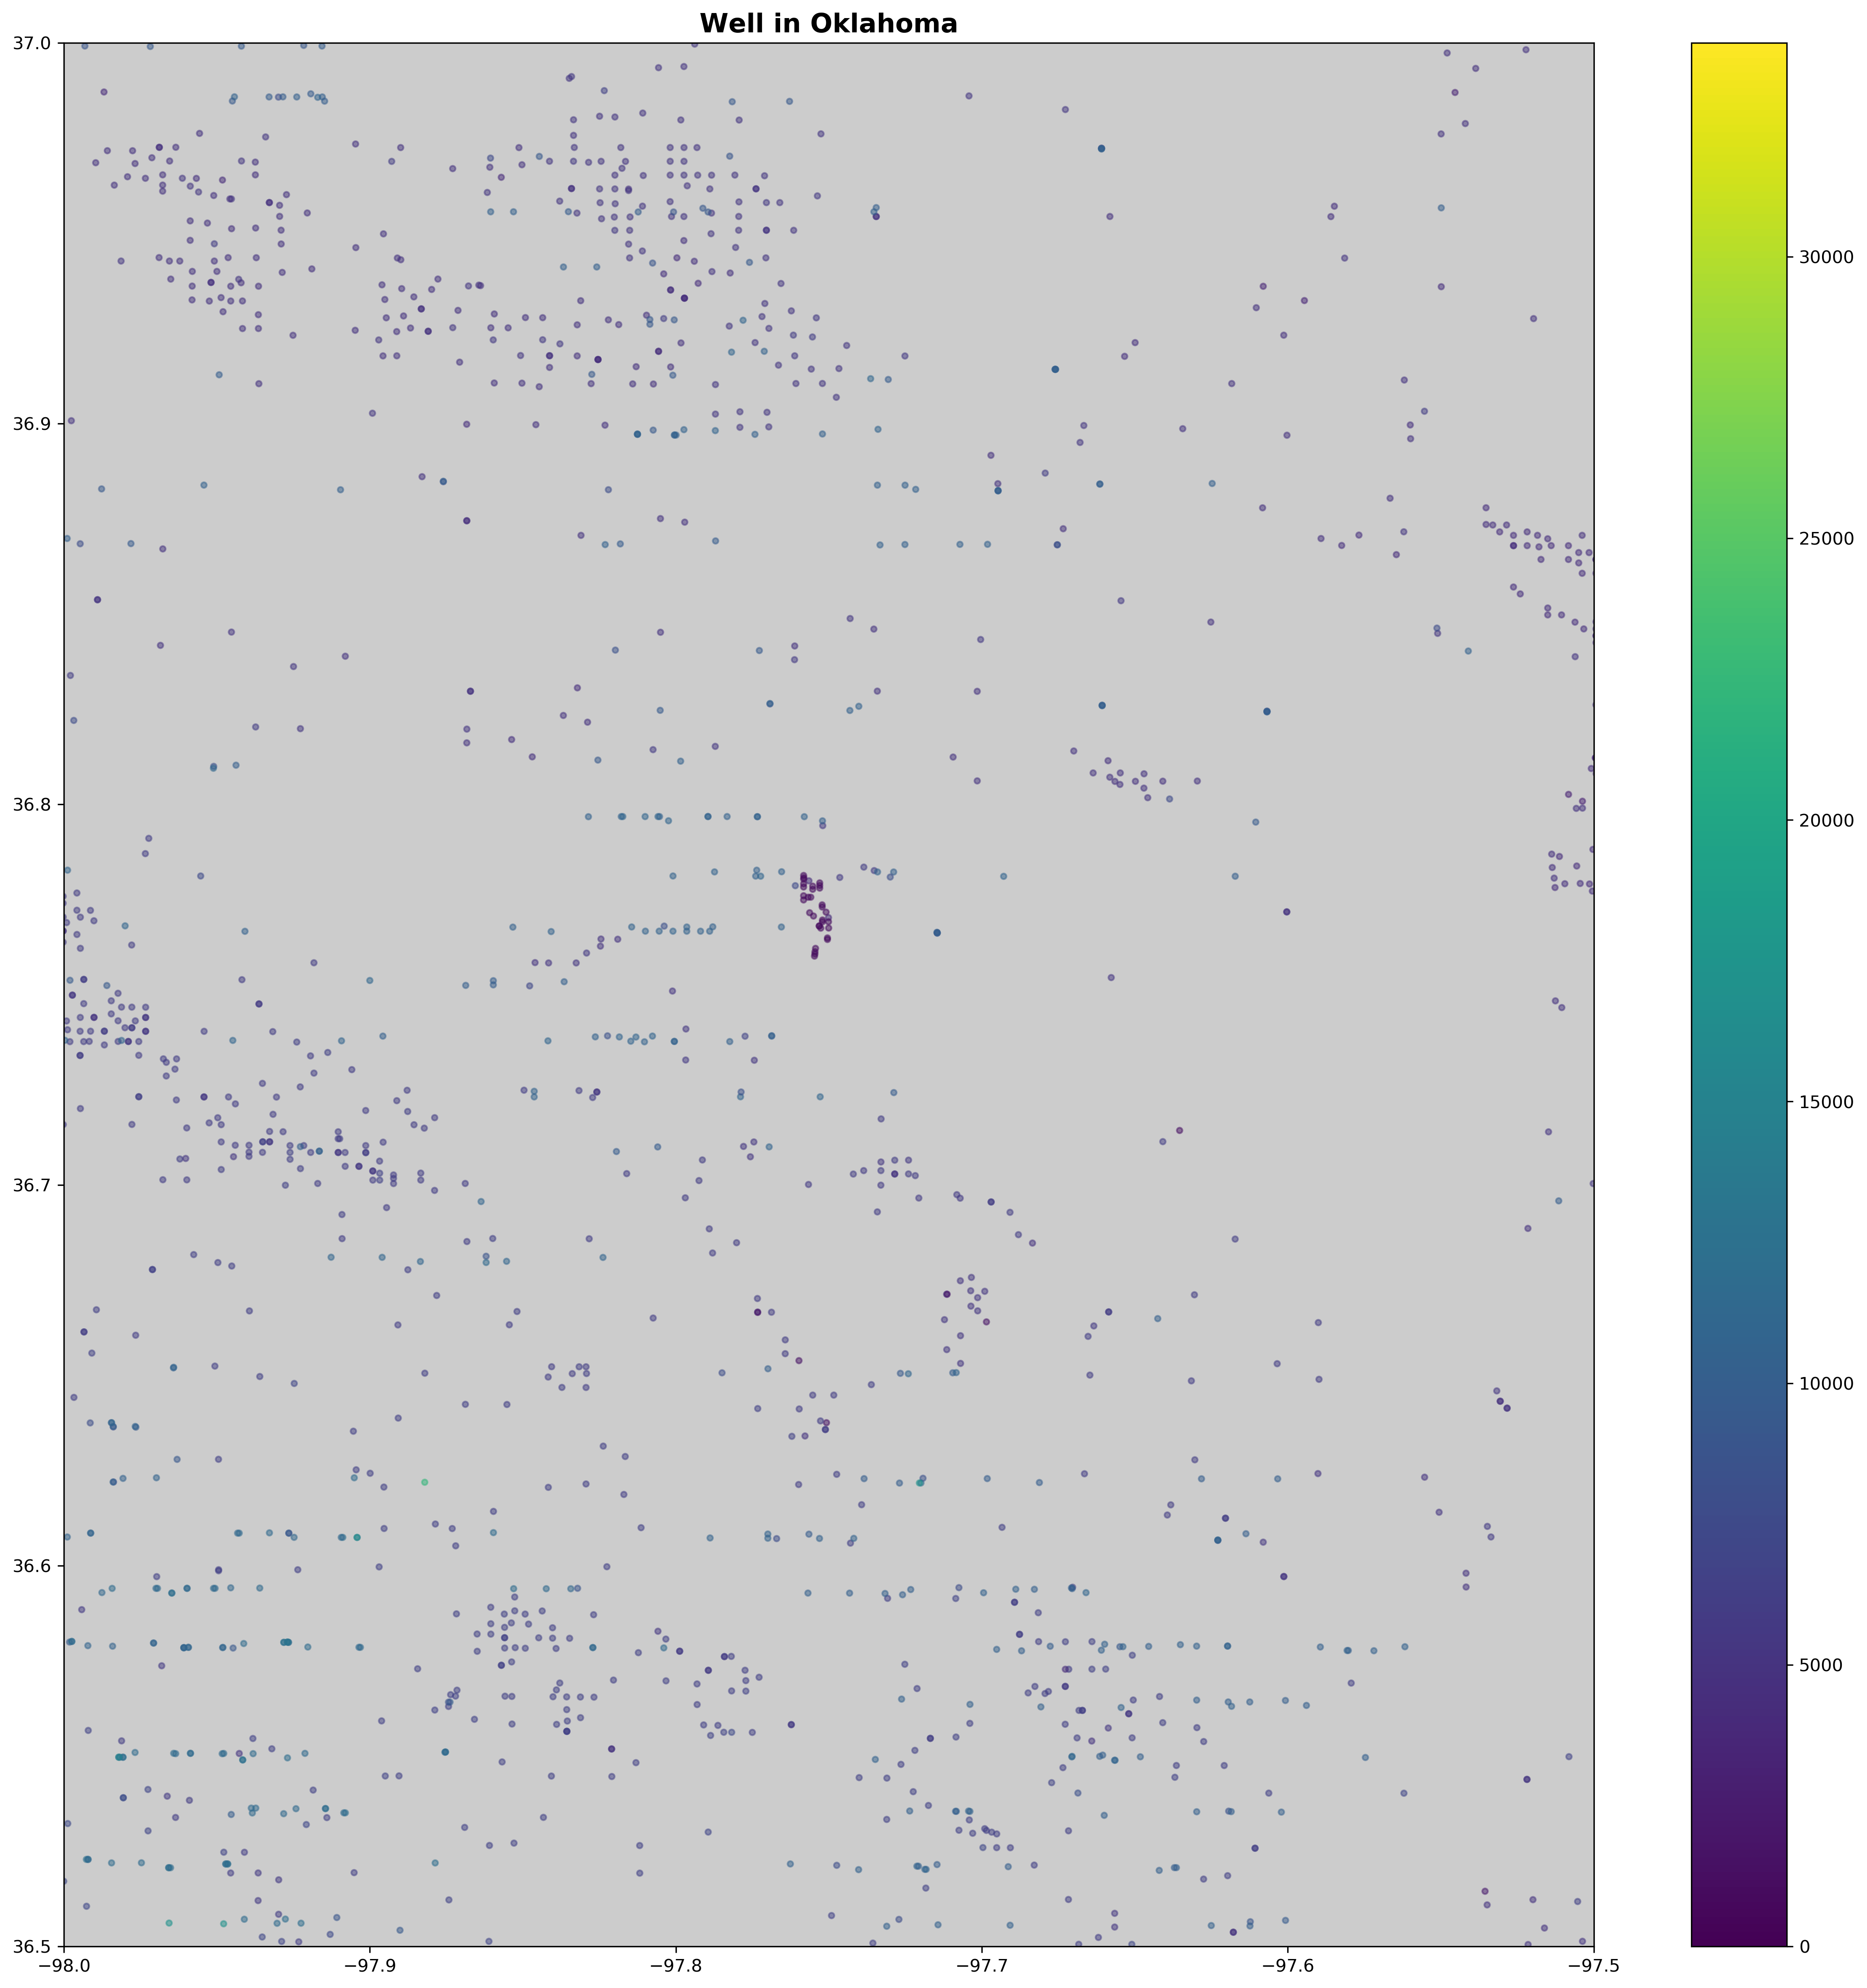

In [242]:
# designate coordinate system
crs = {'init':'epsg:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(well_df['Surface Longitude'], well_df['Surface Latitude'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(well_df, crs = crs, geometry = geometry)

# well 分布
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
# add .shp mapfile to axes
oklahoma_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘Depth Total Projected’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Depth Total Projected',ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Well in Oklahoma', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-103.5, -94)
# plt.ylim(33, 39)
plt.xlim(-98, -97.5)
plt.ylim(36.5, 37)
# show map
plt.show()

# 回归

In [299]:
# 设置地图范围
lat = np.linspace(35, 37, 41)
lon = np.linspace(-99.5, -96, 41)

earthquake = []
# 从底到上，一行一行遍历
for la_index in range(0, len(lat)-1):
    for lo_index in range(0, len(lon)-1):
        grid = earthquake_df[(earthquake_df['latitude']>lat[la_index])&(earthquake_df['latitude']<lat[la_index+1])&(earthquake_df['longitude']>lon[lo_index])&(earthquake_df['longitude']<lon[lo_index+1])]
        earthquake.append(grid.shape[0])
        
injection = []

# 从底到上，一行一行遍历
for la_index in range(0, len(lat)-1):
    for lo_index in range(0, len(lon)-1):
        grid = injection_df[(injection_df['Latitude']>lat[la_index])&(injection_df['Latitude']<lat[la_index+1])&(injection_df['Longitude']>lon[lo_index])&(injection_df['Longitude']<lon[lo_index+1])]
        injection.append(grid['Volume_BPD'].sum())
        
        
well = []

# 从底到上，一行一行遍历
for la_index in range(0, len(lat)-1):
    for lo_index in range(0, len(lon)-1):
        grid = well_df[(well_df['Surface Latitude']>lat[la_index])&(well_df['Surface Latitude']<lat[la_index+1])&(well_df['Surface Longitude']>lon[lo_index])&(well_df['Surface Longitude']<lon[lo_index+1])]
        well.append(grid['Depth Total Projected'].sum())

In [300]:
print(np.array(earthquake))
print(np.array(injection))
print(np.array(well))

[0 0 0 ... 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
[  3050.      0.   4500. ... 102762. 213475.  64370.]


In [301]:
data = pd.DataFrame({'injection': pd.Series(injection), 'well': pd.Series(well),
        'earthquake': pd.Series(earthquake)})

In [302]:
data

,injection,well,earthquake
0,0.0,3050.0,0
1,0.0,0.0,0
2,0.0,4500.0,0
3,0.0,1200.0,0
4,0.0,3400.0,0
...,...,...,...
1595,0.0,201658.0,0
1596,0.0,133431.0,0
1597,0.0,102762.0,0
1598,0.0,213475.0,0


In [303]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

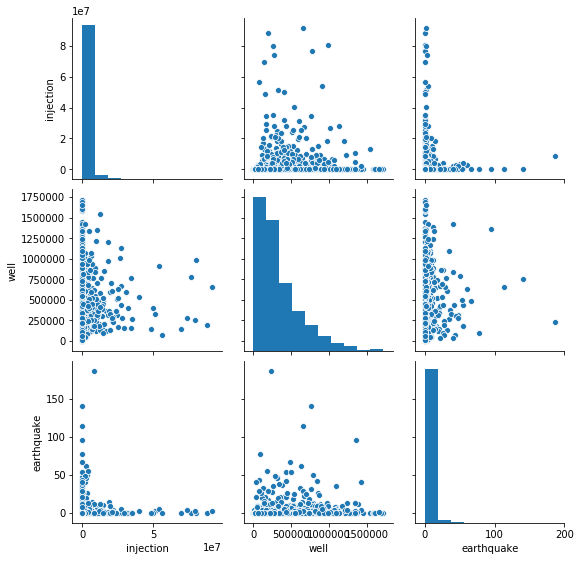

In [304]:
sns.pairplot(data)

In [305]:
data.corr(method='pearson') #pearson

,injection,well,earthquake
injection,1.000000,0.092474,0.001966
well,0.092474,1.000000,0.108173
earthquake,0.001966,0.108173,1.000000


In [306]:
data.corr(method='spearman') #spearman

,injection,well,earthquake
injection,1.000000,0.202615,0.176059
well,0.202615,1.000000,0.198661
earthquake,0.176059,0.198661,1.000000


In [307]:
data.columns

Index(['injection', 'well', 'earthquake'], dtype='object')

In [308]:
x = data[['injection', 'well']]
y = data[['earthquake']]

In [309]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [310]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
print(model.coef_)
print(model.intercept_)

[[-2.86228802e-09  3.52642255e-06]]
[0.89999928]


In [312]:
pd.DataFrame(np.array(model.coef_).reshape(-1,1), x.columns, columns = ['Coeff'])

,Coeff
injection,-2.862288e-09
well,3.526423e-06


In [313]:
predictions = model.predict(x_test)

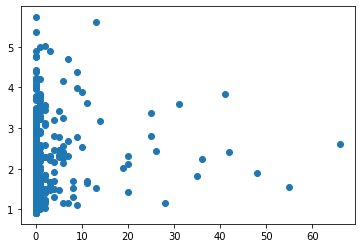

In [314]:
plt.scatter(y_test, predictions)